# Made for Two
# Giving a song recommendation to 2 users based on their current favorites!

## 2-person Song Recommender for Spotify
### Rhea Nair

## Introduction

The inspiration for this project was based on how well Spotify knows us. As a college student, I use Spotify everyday while studying, walking to class, throwing a rager, and more. Spotify knows our music taste better than anyone else in our life, and its recommendations are magically suited to what we like. Especially with the playlists it creates for us, such as Discover Weekly (unique mixtape of 30 fresh songs made for you) and Tastebreakers (collection of 50 songs Spotify thinks I’ll enjoy from typically unexplored genres and artists), Spotify’s recommendation algorithm for each user is off the charts. 

Another important aspect of how I use Spotify is sharing our favorite songs, artists, and playlists. Social media plays a huge part; particularly around this time of year, when all of our top songs and artists of 2019 were released and everyone posts their results on social media to compare. It would be very cool to combine two user’s musical tastes, such as you and your best friend, and recommend songs based on what you both might like!

## Motivation

Spotify has always been great at [recommending](https://qz.com/571007/the-magic-that-makes-spotifys-discover-weekly-playlists-so-damn-good/) songs based on a user’s listening behavior. Playlists such as Discover Weekly, Daily Mixes, and Tastebreakers, are specialized for the user, providing them with a new insight into what their listening activity is like and what they might be interested in. Spotify tracks the activity of single users, and multiple users to generate these new playlists, and this project takes an interesting spin on that. This project, titled “Made for Two”, looks into the listening habits of two users and generates a playlist that is formed based on the two people’s top songs. Users can learn about each other’s music preferences and grow together, learning from each other

This is targeting pretty much anyone who enjoys music and loves to talk about it with their friends and family. Friends, couples, family members, virtually anyone can have a great time. 

## Goal

I really want to find an overlap in tastes between two people. Some of this overlap might be music that one person is not that familiar with that they could potentially explore. To do this I will use user-specific Spotipy data to sort, visualize, and determine which metadata is the most for the analysis. Next, I will create a machine learning model, feed it training and test data and come up with conclusions.

### Imports

- spotipy allows us to work with Spotify data in Python
- pandas and numpy organize and process the data
- matplotlib, seaborn, potly help visualize the data
- collections is used for Counter function
- sklearn.cluster is used for ML


In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

     |████████████████████████████████| 12.9MB 6.6MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11428 sha256=bea0e15556f1c3232b6dbdc862a52ea06251d933d17a028b0d294c835d8257b6
  Stored in directory: /home/jovyan/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)
import collections 
import plotly.graph_objects as go
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import plotly.graph_objects as go


### Spotify Authentication

In [4]:
sp = spotipy.Spotify()
        
cid = "a74491a1b2f8464db1b137e4c7c22f58"
csec = "4ca4c98d3746424aa1c2653e0b0ef5e6"


client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=csec)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

user_id = "rhearox99"

## Data Processing

### Using On Repeat Playlists

The playlist that we’re using to get the tracks from is called On Repeat - which has the user’s current favorite tracks.This playlist helps keep track of what the user has been playing the most over the past 30 days. On Repeat automatically updates, so everything on there is the most up-to-date account of what the user has been playing nonstop. It’s a unique combination of all the music the user loves, regardless of artist or genre! In order to give a great song recommendation for 2 users, it only makes sense to use the On Repeat playlist from each user.

### What data is being used?

I am using Spotify’s database of playlists and songs which are identified by unique ID called a uri.  The uri is a resource identifier that you can enter, for example in Spotify to for an artist, album, or track. Spotipy (a python module that uses the Spotify API) uses the uri to retrieve information and metadata for tracks, playlists, artists, and albums. 

## Audio Metadata

For each song, there are eight “features” [Spotify](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/has) assigned inside its metadata: acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, valence, and tempo. All of these values are floats and defined as: 

- Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. A song that is acoustic does not have any electrical amplification or elements.
- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Values typical range between -60 and 0 db.
- Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Tempo: The overall estimated tempo of a track in beats per minute (BPM).

The model's are using the features: danceability, energy, loudness, speechiness, liveness, and valence.

## Defining Necessary Functions

I want to put both user’s On Repeat tracks into a data frame for better visualization. The dataframe will include the track name, artist, uri (resource identifier for each track), and the 6 audio features chosen - all from the Spotify API. 

In [5]:
def df_user_playlist(userid, playlistid):
    playlist = sp.user_playlist_tracks(user=userid, playlist_id = playlistid)
    song_ids = []
    song_name = []
    artist = []
    for item in playlist['items']:
        song_name.append(item['track']['name'])
        song_ids.append(item['track']['uri'])
    dance = []
    energy=[]
    loudness=[]
    speechiness =[]
    liveness =[]
    valence=[]
    index = 0
    for song in song_ids:     
        if sp.audio_features(song) != [None]:
            dance.append(float(sp.audio_features(song)[0]['danceability']))
            energy.append(float(sp.audio_features(song)[0]['energy']))
            loudness.append(float(sp.audio_features(song)[0]['loudness']))
            speechiness.append(float(sp.audio_features(song)[0]['speechiness']))
            liveness.append(float(sp.audio_features(song)[0]['liveness']))
            valence.append(float(sp.audio_features(song)[0]['valence']))
        else:
            song_name.pop(index)
            
        index+=1
            
        
    data = {'song_name':song_name,'danceability': dance, 'energy': energy, 'loudness' :\
            loudness, 'speechiness':speechiness,'liveness':liveness, 'valence':valence}
    return pd.DataFrame(data)


## Creating playlists

Here are the On Repeat playlists that will be used from each user (Rhea and Srivarshini) and the Top 50.


In [6]:
top_50 = df_user_playlist('Srivarshini','37i9dQZEVXbLRQDuF5jeBp' )
rhea_most_played = df_user_playlist('rhearox99','37i9dQZF1EpycW6RHg64Ph' )
sriv_most_played = df_user_playlist('Srivarshini','37i9dQZF1EpzO9zILKj4kw' )

In [7]:
chill_rb = df_user_playlist('rhearox99','37i9dQZF1DX2UgsUIg75Vg' )
chill = df_user_playlist('rhearox99','37i9dQZF1DX4WYpdgoIcn6' )
rb = df_user_playlist('rhearox99','37i9dQZF1DX4SBhb3fqCJd' )

In [8]:
indie_pop = df_user_playlist('rhearox99','37i9dQZF1DWWEcRhUVtL8n' )
pop = df_user_playlist('rhearox99','37i9dQZF1DWUa8ZRTfalHk' )

# Exploratory analysis & data visualization¶


### Plotting the data¶

This is set with all the necessary information in the dataframe, and now the data can be plotted on a bar graph. Now that you can visualize all the audio features for each of the playlists and both combined, you can start seeing the overlap in both user’s tastes.
I plotted each audio feature for both user’s playlists. There are 6 graphs of distinct audio features for each user’s playlists. All the graphs have different colors so it is easier to analyze, and the horizontal black line going across is the mean value for the audio feature. Furthermore, the names of the songs are not included since those are not necessary for the analysis of each playlist.  

These are two graphing functions here. The first one graphs one audio feature at a time for each user’s playlist with the mean (black line). The second function graphs both playlists for each audio feature and shows the means of each audio feature as well.

In [9]:
features= ['danceability','energy', 'loudness', 'speechiness', 'liveness', 'valence']

def graph_playlist(playlist):
    colors = ['#00ccff', '#00cc99', '#ff9966', "#ff6699", '#ff0000', '#9966ff']
    fig, ax = plt.subplots(len(features),1,figsize=(50,50))
    feature = 0
    color = 0
    for a in ax:
        
        a.bar(x=playlist['song_name'], width = .8, color = colors[color], \
              height=playlist[features[feature]].sort_values(ascending=True))
        mean = playlist[features[feature]].mean()
        y = [mean for _ in range(len(playlist['song_name']))]
        a.plot(playlist['song_name'], y, color='#000000', linewidth=4.5)
        a.set_title(features[feature].capitalize() + ' in Playlist', fontsize=40)
        a.set_ylabel(features[feature].capitalize(), fontsize=28)
        a.set_xlabel('Songs', fontsize=28)
        a.set_xticklabels([])
        for tick in a.get_yticklabels():
                tick.set_fontsize(20)
        feature+=1
        color+=1
        
def graph_2_playlist(playlist1, playlist2):
    colors1 = ['#00ccff', '#00cc99', '#ff9966', "#ff6699", '#ff0000', '#9966ff']
    colors2 = ['#ccf5ff','#ccfff2','#ffccb3','#ffb3cc', '#ff8080', '#ccb3ff']
    color1 =0 
    color2=0
    pts1 = []
    pts2 = []
    for f in features:
        mean1 = playlist1[f].mean()
        mean2 = playlist2[f].mean()
        
        pts1.append(mean1)
        pts2.append(mean2)

        data = [
            go.Bar(x=playlist1.index, y=playlist1[f].sort_values(ascending=True), name='Playlist 1',\
                   marker_color = colors1[color1],   
                    #base=0
                   ),
            go.Bar(x=playlist2.index, y=playlist2[f].sort_values(ascending=True), name='Playlist 2',\
                   marker_color = colors2[color2],  
                   #base=0,
                   #width=0.5
                  )
        ]
        x = go.Figure().add_shape(
            # Line Horizontal
            go.layout.Shape(
                type="line",
                x0=0,
                y0=mean1,
                x1=30,
                y1=mean1,
                line=dict(
                    color="LightSeaGreen",
                    width=4,
                    dash="dashdot",
                ),
        )).update_shapes(dict(xref='x', yref='y'))



        layout = go.Layout(
            barmode='group',
        )



        fig = go.Figure(data=data,layout = layout)
        fig.add_shape(
            go.layout.Shape(
                type="line",
                x0=-1,
                y0=mean1,
                x1=30,
                y1=mean1,
            ))
        fig.add_shape(
            go.layout.Shape(
                type="line",
                x0=-1,
                y0=mean2,
                x1=30,
                y1=mean2,
            ))
        fig.update_layout(
            title= f.capitalize() + " in Playlist 1 vs Playlist 2",
            xaxis_title= "Songs",
            yaxis_title=f.capitalize(),
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#000000"
            )
        )


            
        iplot(fig, show_link=False)



        color1+=1
        color2+=1

### Rhea's Most Played Songs

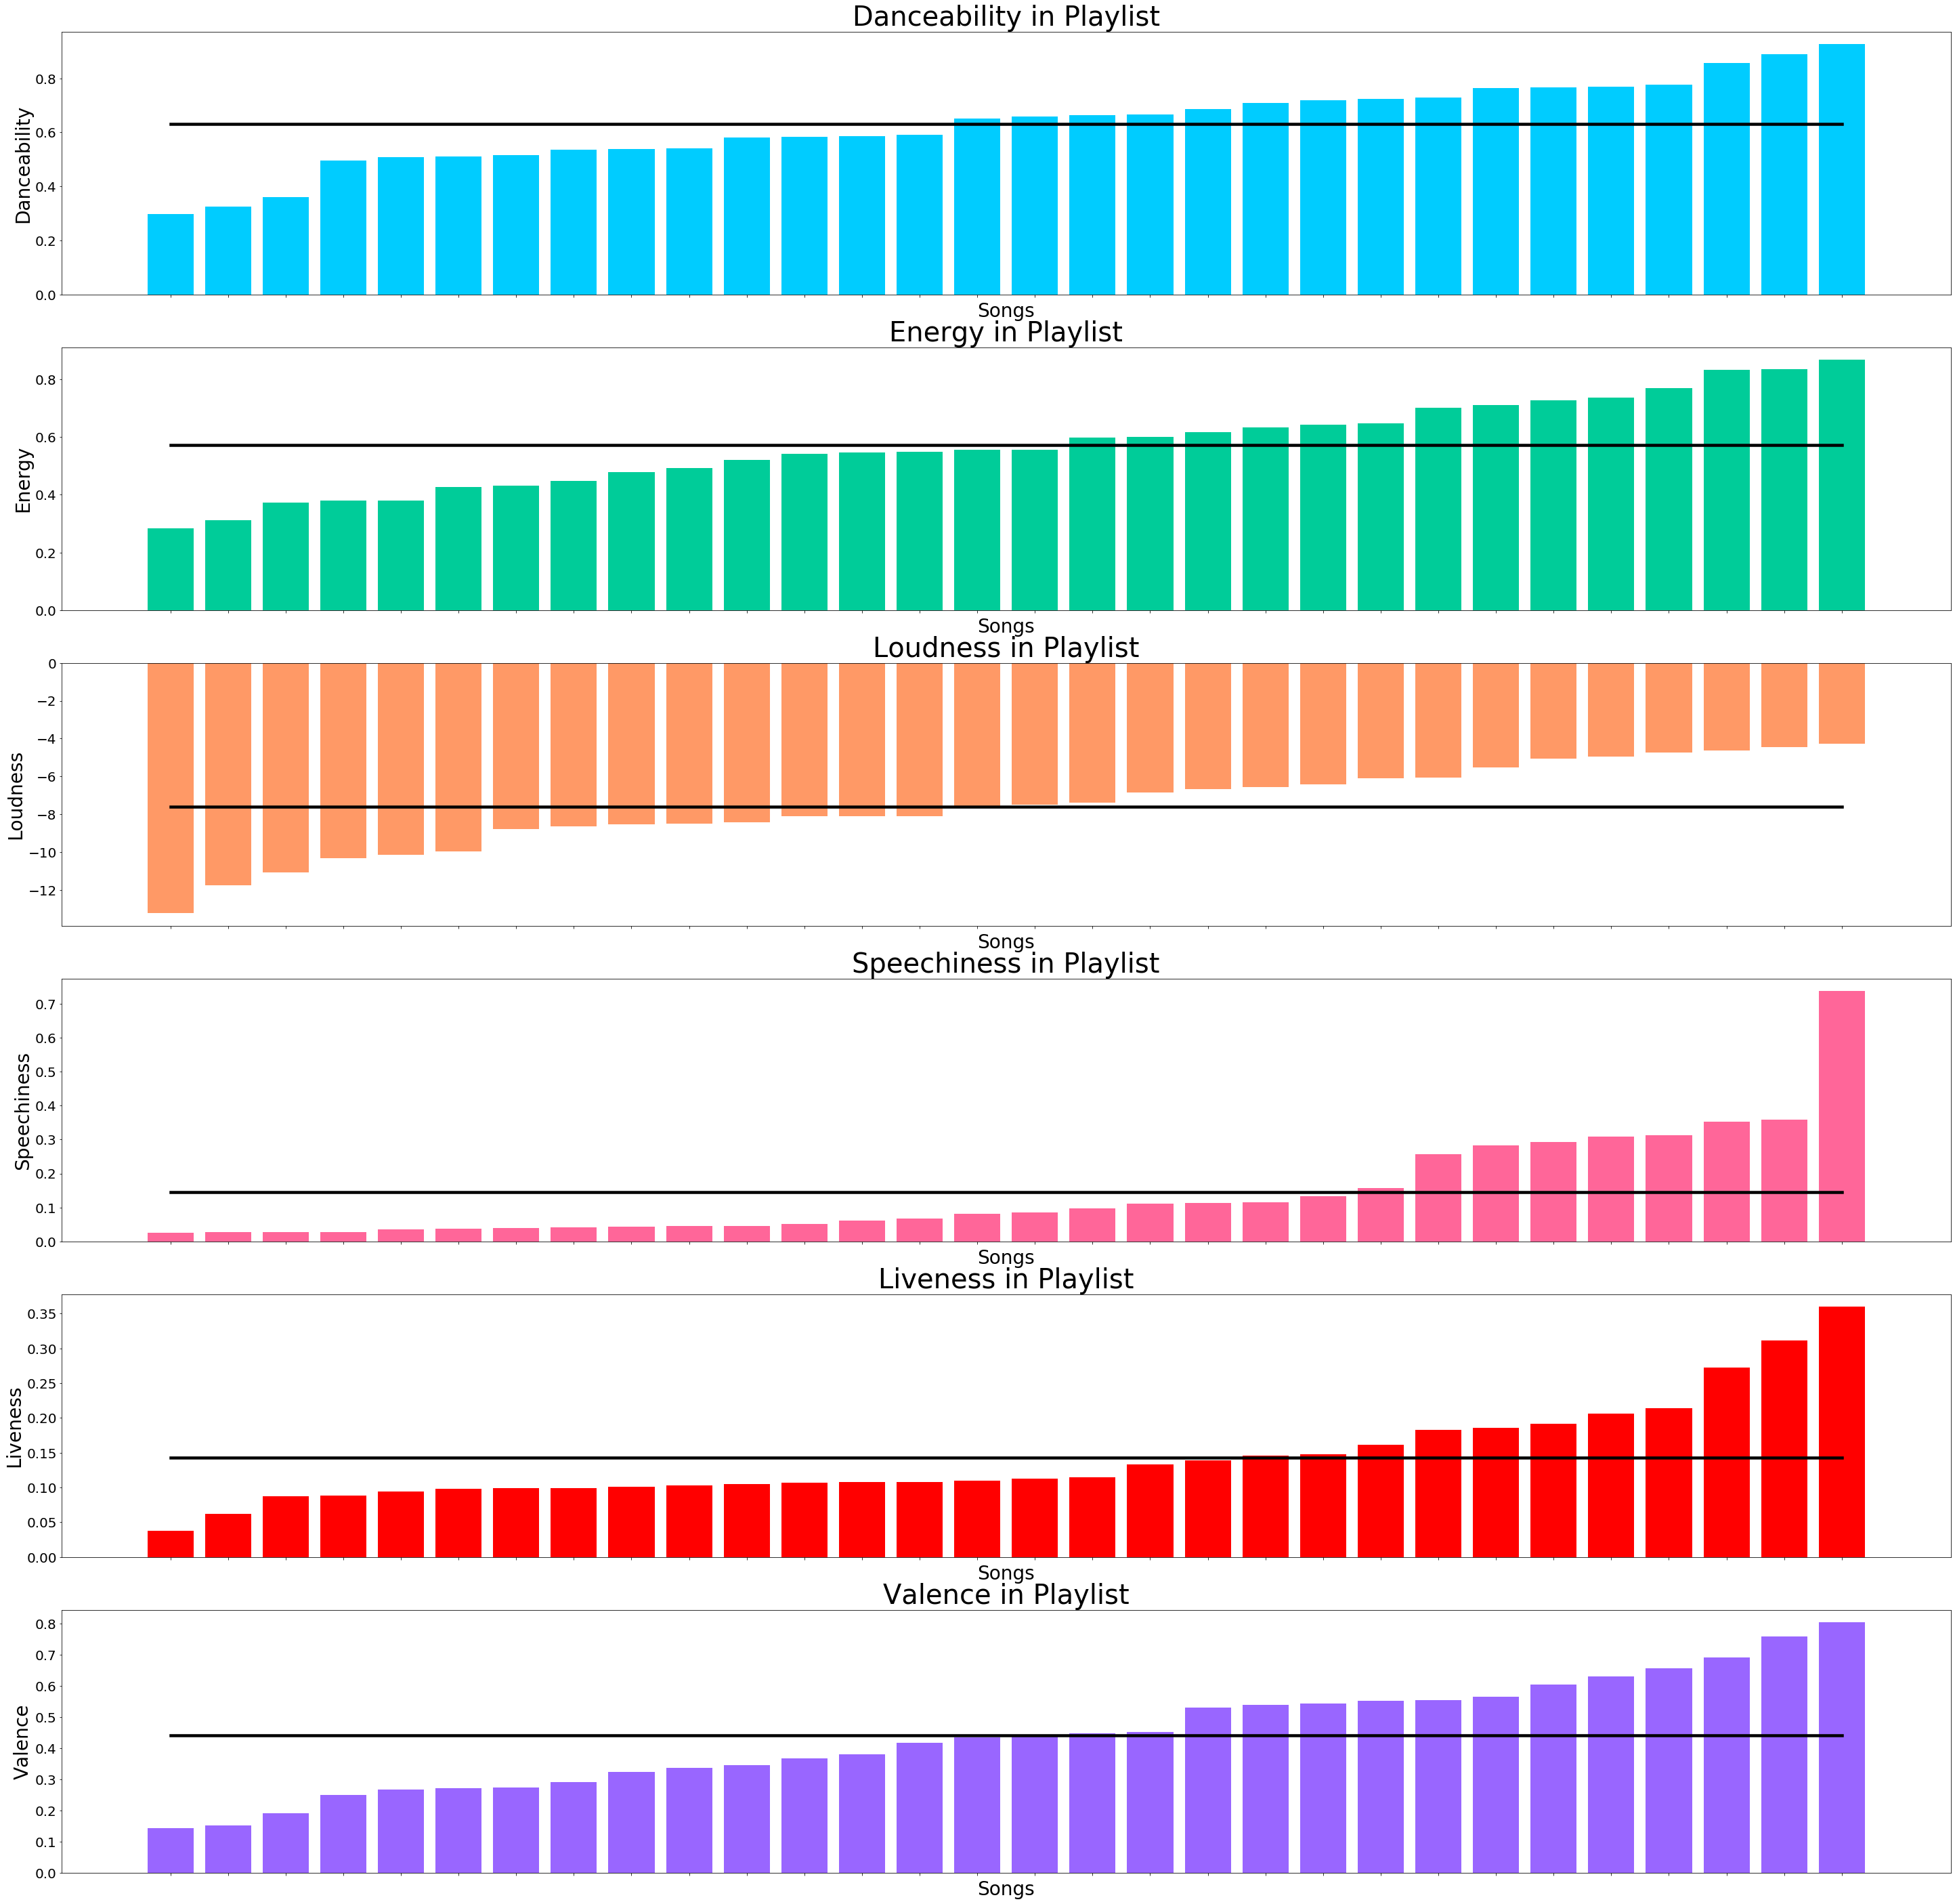

In [10]:
graph_playlist(rhea_most_played)

### Sriv's Most Played Songs

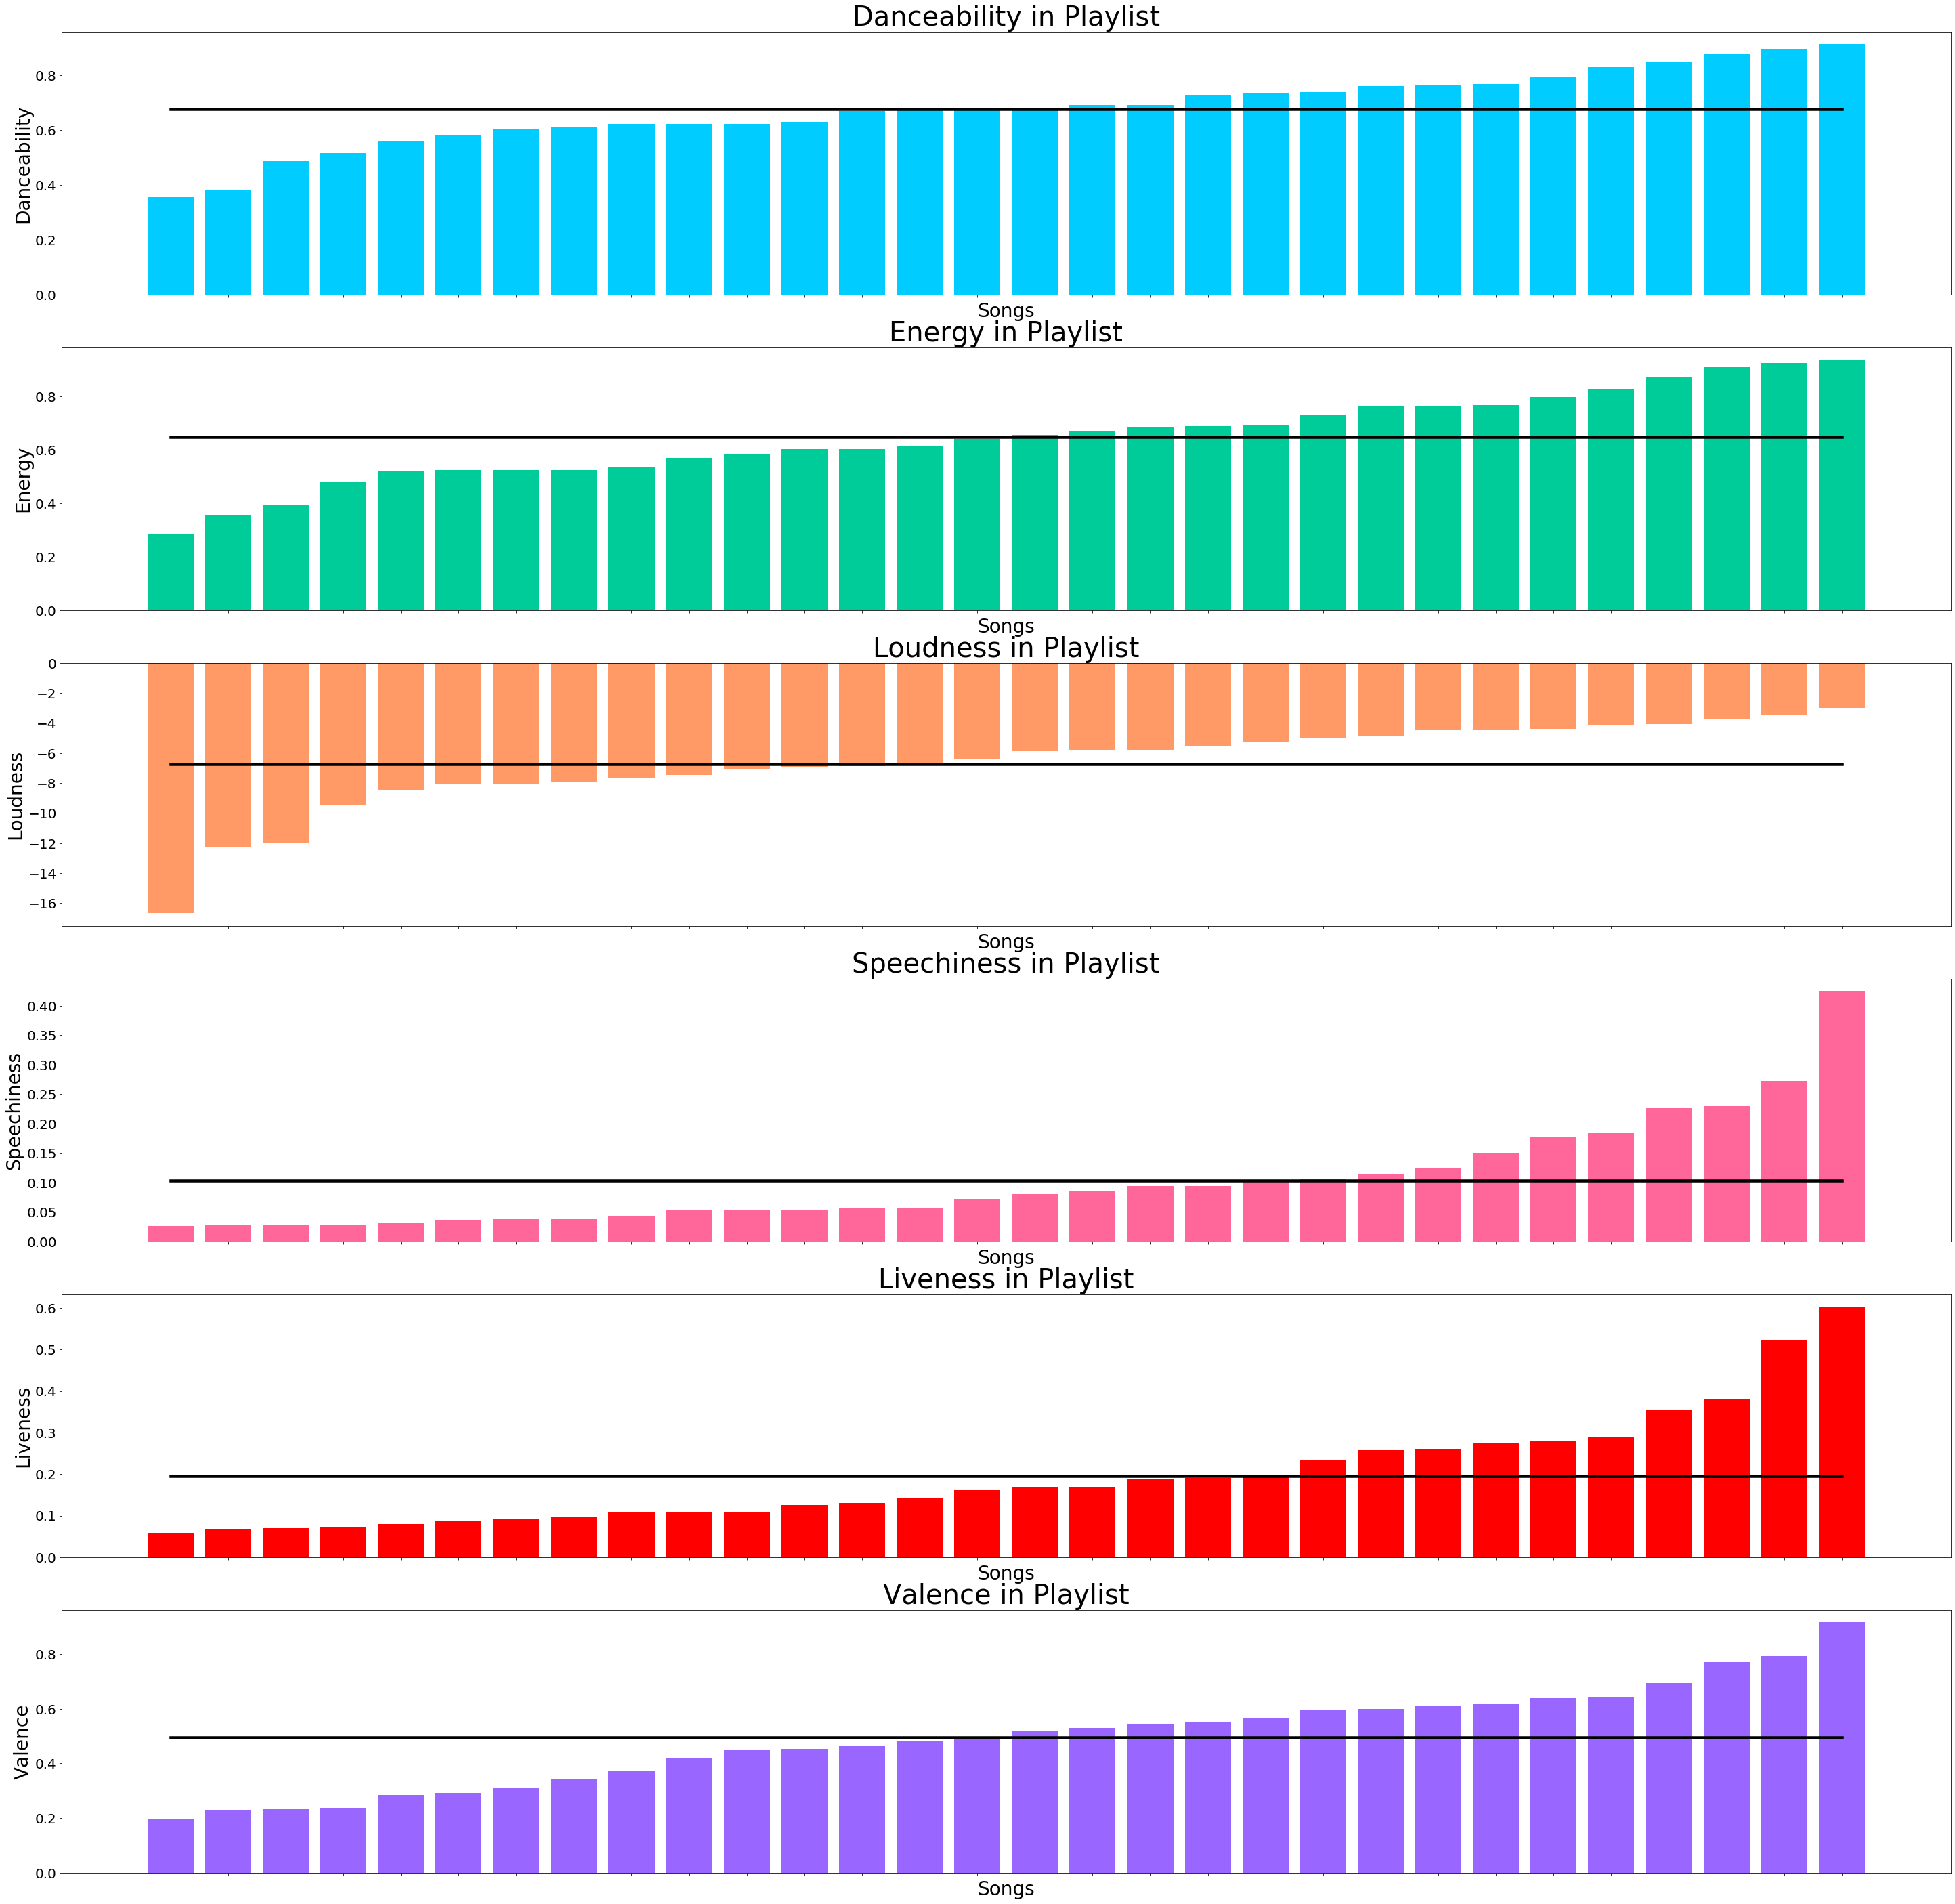

In [11]:
graph_playlist(sriv_most_played)

The graphs above plot the average for each feature. They represent an estimate of what each playlists cluster center could be. 

In [12]:
graph_2_playlist(rhea_most_played, sriv_most_played)

The graphs above plot the average for each playlist's features together. The space in between the black lines represents an estimate of the range that a feature of a song liked by both users would fall in. 

# Data Analysis


## Machine Learning

### KMeans Clustering

On the surface level, this algorithm takes in 2 inputs, in this case, the top 50 songs from each user and runs a KMeans cluster algorithm, forming clusters for us to begin calculations. This is the best machine learning algorithm for this application because, as it is an unsupervised learning algorithm, the model will able to learn from the data, picking up patterns on its own.

### KMeans Clustering with 2 clusters

The [Kmeans](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a) algorithm tries to partition a data set into K- predefined clusters, in this case, 2 clusters. Each data point belongs to only one group. To perform this, I concatenated the two user’s lists and ran passed it into the KMeans. Next, I passed each individual user’s table into the model and found the centers of each cluster and found the median. This is the point that I’ll use for future calculations. I calculated the distances from this median to points around it. The radius that is defined was the distance from both the cluster centers divided by 2. If a data point resided in this radius, it was a good fit to be recommended. Out of the songs that resided in the radius, using the distance formula, ranked them from shortest to farthest: the shorter the distance from the median point, the more recommendable the song is. The dataframe shows the top songs within the radius that would be recommended to both users based on their 30 current, favorite songs on rotation.

### Silhouette Score

The [Silhouette Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) is a measure of how similar an object is to its own cluster compared to other clusters. The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.


In [13]:
def distance(pt1, pt2):
    return np.linalg.norm(pt1-pt2)

def median(pt1, pt2):
    return (pt1+pt2)/2

def radius(pt1, pt2):
    dist = np.linalg.norm(pt1-pt2)
    return dist/2

def song_points(playlist):
        p = playlist.apply(lambda row: [row.danceability,row.energy,row.loudness, row.speechiness, row.liveness,\
                                  row.valence ], axis=1)
        p = [x for x in p]
        return (np.array(p))

def df_closest_songs(med, radius, playlist):
    s = song_points(playlist)
    distances = []
    for index, row in playlist.iterrows():
        d =  distance(med,s[index])
        x = [row['song_name'], d]
        if distance(med,s[index]) <= radius:
            x.append(True)
        else:
            x.append(False)
            
        distances.append(x)
    
    return pd.DataFrame(distances, columns = ['song_name', 'distance', 'within_radius']).\
sort_values(by=['distance']).reset_index(drop=True)
    

In [14]:
['danceability','energy', 'loudness', 'speechiness', 'liveness', 'valence']

rhea = song_points(rhea_most_played)

sriv = song_points(sriv_most_played)

rhea_sriv = np.concatenate((rhea, sriv), axis=0)

rhea_sriv_kmeans = KMeans(n_clusters=2, random_state=0).fit(rhea_sriv)

print("Rhea:  " + str(collections.Counter(rhea_sriv_kmeans.predict(rhea))))
print("Sriv:  " + str(collections.Counter(rhea_sriv_kmeans.predict(sriv))))

rhea_sriv_labels = rhea_sriv_kmeans.labels_
print("silhouette_score:  "+str(metrics.silhouette_score(rhea_sriv, rhea_sriv_labels, metric='euclidean')))
print(rhea_sriv_kmeans.cluster_centers_)
center0 = rhea_sriv_kmeans.cluster_centers_[0]
center1 = rhea_sriv_kmeans.cluster_centers_[1]
rhea_sriv_median = (center0+center1)/2
print("median:  ",rhea_sriv_median)

Rhea:  Counter({1: 16, 0: 14})
Sriv:  Counter({1: 22, 0: 8})
silhouette_score:  0.5158520480199327
[[ 0.666       0.4785     -9.84504545  0.15312727  0.16665     0.43563636]
 [ 0.64768421  0.68657895 -5.63176316  0.10852368  0.17091842  0.48615789]]
median:   [ 0.65684211  0.58253947 -7.73840431  0.13082548  0.16878421  0.46089713]


The silhouette_score is in between 0 and 1 so there is a slight overlap of the clusters.
The median printed above is the center of the area of overlap between Rhea and Sriv's playlists. 

### Testing the model on the Top 50 Playlist

In [15]:
rhea_sriv_radius = (radius(center0, center1))
df = df_closest_songs(rhea_sriv_median, rhea_sriv_radius, top_50)
df

,song_name,distance,within_radius
0,Blueberry Faygo,0.257057,True
1,ROCKSTAR (feat. Roddy Ricch),0.271742,True
2,Righteous,0.393502,True
3,DOLLAZ ON MY HEAD (feat. Young Thug),0.464299,True
4,WAP (feat. Megan Thee Stallion),0.481398,True
5,UN DIA (ONE DAY) (Feat. Tainy),0.525013,True
6,Lucid Dreams,0.610833,True
7,Daylight,0.611989,True
8,the last great american dynasty,0.816393,True
9,Savage Love (Laxed - Siren Beat),0.857901,True


## Conclusion about the data

The top songs range from radius 0.304834 to 1.903180, as they are best fit to both users. There is definite bias with the user playlist model because I used my own data and a friend's data. Therefore, I will explore this approach with genres/sub-genres, using Spotify's offical playlists.

# Does this work on genres too?

## Hypothesis Testing

I decided that it would be interesting to test this model against Spotify's official genre playlists and mixed genre playlists.

- [Pop Rising](https://open.spotify.com/playlist/37i9dQZF1DWUa8ZRTfalHk?si=1gkRUNi5QTG1y3G8A3p1CA): Pop Hits of Tomorrow 
- [Ultimate Indie](https://open.spotify.com/playlist/37i9dQZF1DX2Nc3B70tvx0?si=A5G60O4VQJC5g-S4u1hGxQ): The Best Indie Tracks right now
- [Indie Pop](https://open.spotify.com/playlist/37i9dQZF1DWWEcRhUVtL8n?si=_fYpf-SETxSfwm1RxIWjVw): New and Approved indie pop

I hypothesized that for each of these curated playlists, this model will classify at least 50% of the songs in the mixed genre playlist.

## Genre Analysis
### Indie-Pop

First, I used two playlists, Spotify’s official Indie and Pop playlists. After concatenating these lists, and creating the model, I performed the clustering. Passing in Spotify’s official Indie-Pop playlist and I found that on average 57% of the songs in the user's top songs returned by the algorithm belonged in the official Indie-Pop playlist.

## Creating a model for the Indie-Pop genre 

In [16]:
['danceability','energy', 'loudness', 'speechiness', 'liveness', 'valence']

indie = df_user_playlist('rhearox99','37i9dQZF1DX2Nc3B70tvx0' )

pop_pts = song_points(pop)
indie_pts = song_points(indie)

pop_indie_pts= np.concatenate((pop_pts, indie_pts), axis=0)

pop_indie_kmeans = KMeans(n_clusters=2, random_state=0).fit(pop_indie_pts)

print("Pop:  " + str(collections.Counter(pop_indie_kmeans.predict(pop_pts))))
print("Indie:  " + str(collections.Counter(pop_indie_kmeans.predict(indie_pts))))

pop_indie_labels = pop_indie_kmeans.labels_

print("silhouette_score:  "+str(metrics.silhouette_score(pop_indie_pts, pop_indie_labels, metric='euclidean')))
print("Cluster centers: ",pop_indie_kmeans.cluster_centers_)
pop_indie_center0 = pop_indie_kmeans.cluster_centers_[0]
pop_indie_center1 = pop_indie_kmeans.cluster_centers_[1]

pop_indie_median = median(pop_indie_center0, pop_indie_center1)
print("median:  ",pop_indie_median)
pop_indie_radius = radius(pop_indie_center0, pop_indie_center1)
print("radius:  ",pop_indie_radius)

Pop:  Counter({1: 61, 0: 24})
Indie:  Counter({1: 54, 0: 45})
silhouette_score:  0.5538228118694501
Cluster centers:  [[ 0.59333333  0.50044928 -9.61753623  0.05620725  0.13604928  0.4301942 ]
 [ 0.6414      0.68111304 -5.73633043  0.08228957  0.1630487   0.52782348]]
median:   [ 0.61736667  0.59078116 -7.67693333  0.06924841  0.14954899  0.47900884]
radius:   1.9435565963246384


In [17]:
test_indie_pop = df_closest_songs(pop_indie_median, pop_indie_radius, indie_pop)

total_within_radius_indie_pop = len(test_indie_pop.loc[test_indie_pop.within_radius == True])
labels=['Incorrect', 'Correct']
values = [(len(test_indie_pop))- total_within_radius_indie_pop, total_within_radius_indie_pop]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)]).update_layout(title='Indie Pop songs against the model')
fig.show()


## Creating a model for the Chill-R&B genre 

A similar procedure, concatenating Spotify’s official Chill and R&B playlists, creating the model, and clustering.

- [Chill Hits](https://open.spotify.com/playlist/37i9dQZF1DX4WYpdgoIcn6?si=P8Kw_t04SrKp6rlZE_TRAA): New and Recent Chill Tunes
- [R&B](https://open.spotify.com/playlist/37i9dQZF1DX4SBhb3fqCJd?si=72GDLh70SLGEwsbreWrDmg): The Hottest R&B Tunes
- [Chilled R&B](https://open.spotify.com/playlist/37i9dQZF1DX2UgsUIg75Vg?si=19_iuY0VT3qld9BFuqqghQ): Chilled R&B Jams


In [18]:
['danceability','energy', 'loudness', 'speechiness', 'liveness', 'valence']


chill_pts = song_points(chill)
rb_pts = song_points(rb)

rb_chill_pts= np.concatenate((rb_pts, chill_pts), axis=0)

rb_chill_kmeans = KMeans(n_clusters=2, random_state=0).fit(rb_chill_pts)

print("RB:  " + str(collections.Counter(rb_chill_kmeans.predict(rb_pts))))
print("Chill:  " + str(collections.Counter(rb_chill_kmeans.predict(chill_pts))))

rb_chill_labels = rb_chill_kmeans.labels_

print("silhouette_score:  "+str(metrics.silhouette_score(rb_chill_pts, rb_chill_labels, metric='euclidean')))
print("Cluster centers: ",rb_chill_kmeans.cluster_centers_)
rb_chill_center0 = rb_chill_kmeans.cluster_centers_[0]
rb_chill_center1 = rb_chill_kmeans.cluster_centers_[1]

rb_chill_median = median(pop_indie_center0, pop_indie_center1)
print("median:  ",rb_chill_median)

rb_chill_radius = radius(pop_indie_center0, pop_indie_center1)
print("radius:  ",rb_chill_radius)

RB:  Counter({0: 35, 1: 10})
Chill:  Counter({0: 59, 1: 41})
silhouette_score:  0.5497361067086364
Cluster centers:  [[  0.64415957   0.58696809  -6.29192553   0.11121915   0.16175532
    0.46968191]
 [  0.59258824   0.37576471 -10.2565098    0.09197647   0.14828824
    0.33826275]]
median:   [ 0.61736667  0.59078116 -7.67693333  0.06924841  0.14954899  0.47900884]
radius:   1.9435565963246384


In [19]:
test_chill_rb = df_closest_songs(rb_chill_median, rb_chill_radius, chill_rb)

total_within_radius_rb_chill = len(test_chill_rb.loc[test_chill_rb.within_radius == True])
labels=['Incorrect', 'Correct']
values = [(len(test_chill_rb))- total_within_radius_rb_chill, total_within_radius_rb_chill]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)]).update_layout(title='Chill R&B songs against the model')
fig.show()

## Analysis 
- In the Indie Pop Songs model, 57% of the tracks were accurate.
- In the Chill R&B model, 72% of the tracks were accurate.



## Conclusion

To conclude, the models surpassed the expectations of the hypothesis. The hypothesis stated that "for each of these curated playlists (Ultimate Indie, Rising Pop, Indie Pop, Chill Hits, R&B, Chill R&B), the model will classify at least 50% of the songs in the mixed genre playlist". After running the Indie Pop Songs model, there was a 57% success rate; the Chill R&B model returned a 72% success rate. Clearly, this model was able to successfully classify correctly with over a 50% success rate. 
 

Furthermore, to learn more about Kmeans Clustering and recommender systems: 

- https://towardsdatascience.com/recommender-systems-in-practice-cef9033bb23a
- https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada
- https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a
